# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
df_fulfil = pd.read_csv("fulfilment_center_info.csv")
df_meal = pd.read_csv("meal_info.csv")
df_train = pd.read_csv("train.csv")

df_test = pd.read_csv("test_QoiMO9B.csv")

In [3]:
df_test_ID = df_test['id']

In [4]:
df_train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [6]:
df_fulfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [7]:
df_meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


# Pre processing

In [8]:
# df_train.drop('id', axis =1, inplace =True) 
df_train.head(4)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54


In [9]:
df_train['center_id'].nunique()

77

In [10]:
df_train.duplicated().sum()


0

In [11]:
df_train.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [12]:
df_total = pd.concat([df_train, df_test],axis= 0)

In [13]:
df_total.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0


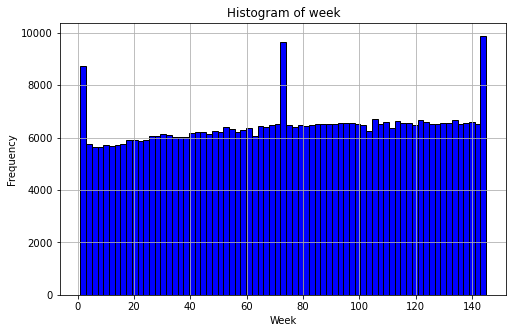

In [14]:
df_train['week'].hist(figsize=(8, 5), bins=71,color='blue', edgecolor='black')
plt.title('Histogram of week')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.show()

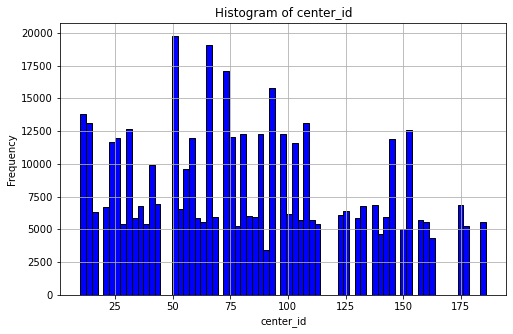

In [15]:
df_train['center_id'].hist(figsize=(8, 5), bins=71, color='blue', edgecolor='black')
plt.title('Histogram of center_id')
plt.xlabel('center_id')
plt.ylabel('Frequency')
plt.show()

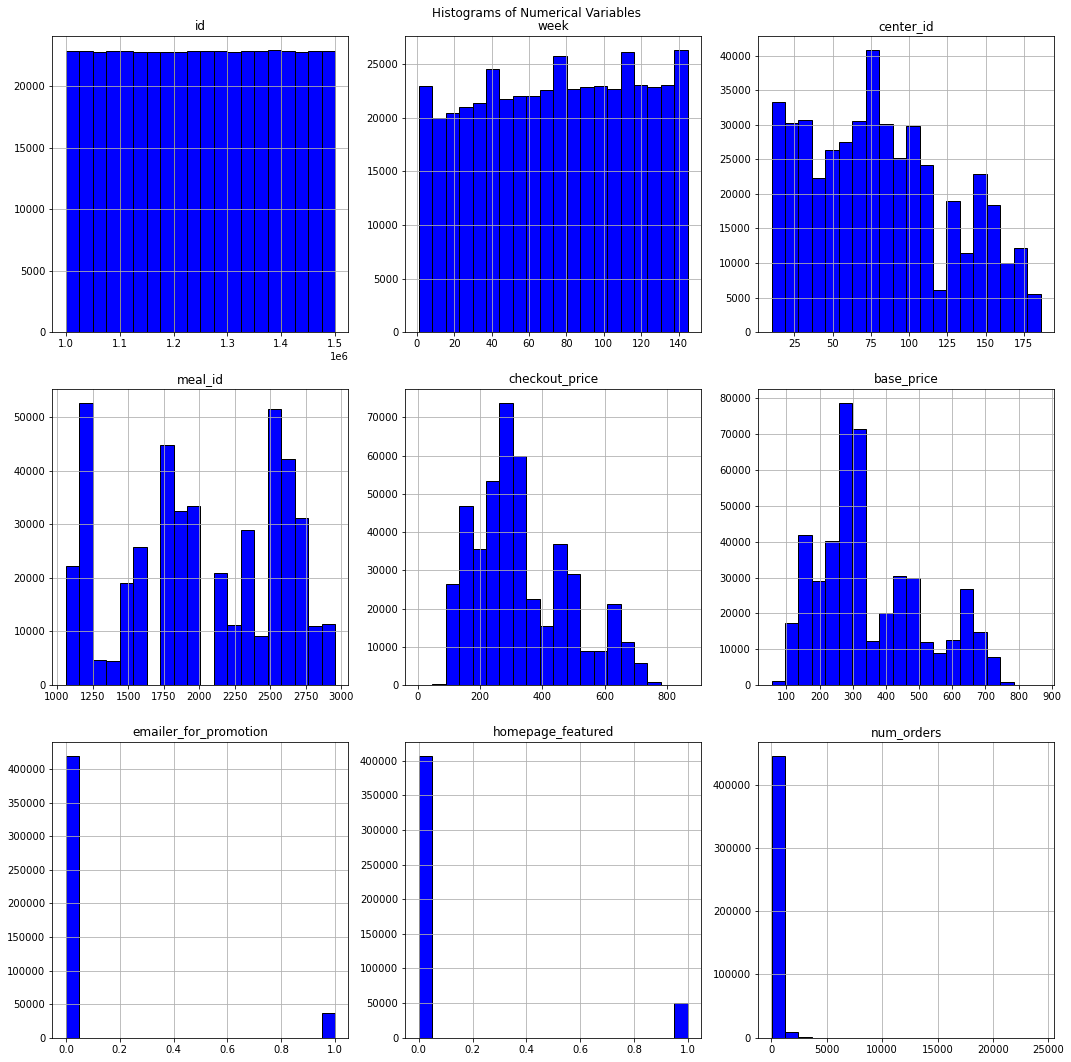

In [16]:
df_train.hist(figsize=(15, 15), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')  
plt.tight_layout()  
plt.show()

In [17]:
# Function to plot bar graphs in a subplot.
def plot_bar_for_df(datafrm, rows, cols, graph_type):
  plot_position = 1     # variable introduced to make positioning of the plot easier.
  for col in datafrm.columns:
    plt.subplot(rows, cols, plot_position)
    datafrm[col].value_counts().sort_index().plot(kind=graph_type)  # here, sorting is done based on count.
    #df_cat[col].value_counts().plot(kind='bar')               # here, sorting is done based on value.
    plt.xticks(rotation=0)
    plt.title(col+' Distribution')
    plot_position += 1  # increments plot_position to fix the plot position

  plt.tight_layout()        # makes sure that the plots do not overlap each other.
  plt.show()





In [18]:
def plot_box_for_df( datafrm, rows, cols ):     # function written to plot boxplots as subplots in a generic way.
  plt.figsize=(15, 15)
  plot_position = 1     # variable introduced to make positioning of the plot easier.
  for col in datafrm.columns:
    plt.subplot( rows, cols, plot_position )
    datafrm[[col]].boxplot()
    plt.xticks(rotation=0)
    plt.title(col+' Box')
    plot_position += 1  # increments plot_position to fix the plot position

  plt.tight_layout()        # makes sure that the plots do not overlap each other.
  plt.show()



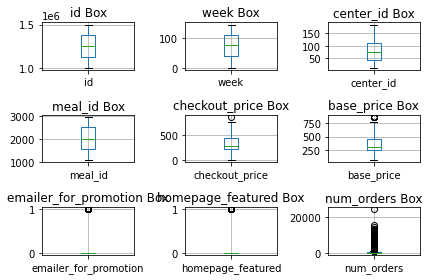

In [19]:
plot_box_for_df(df_train, 3, 3)

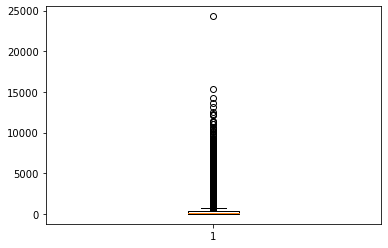

In [20]:
plt.boxplot(df_train['num_orders'])
plt.show()

In [21]:
num_cols = ['week', 'checkout_price', 'base_price', 'num_orders']
cat_cols = ['center_id','meal_id','emailer_for_promotion','homepage_featured']

In [22]:
num_df = df_train[num_cols]
cat_df =  df_train[cat_cols]

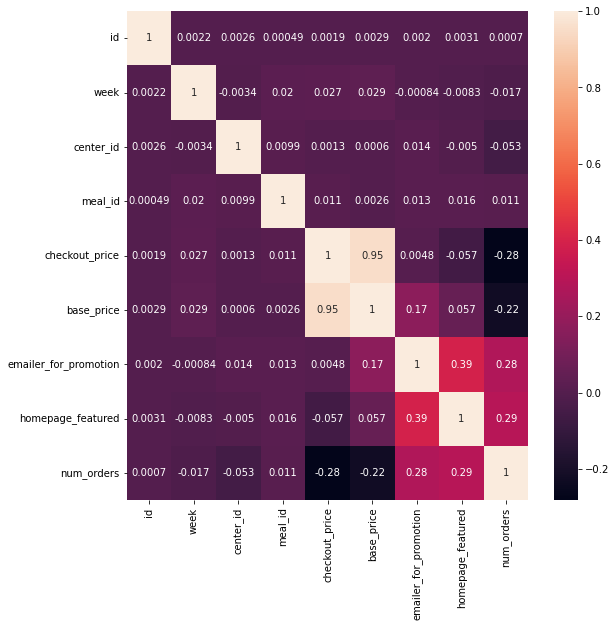

In [23]:
plt.figure(figsize = (9,9))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

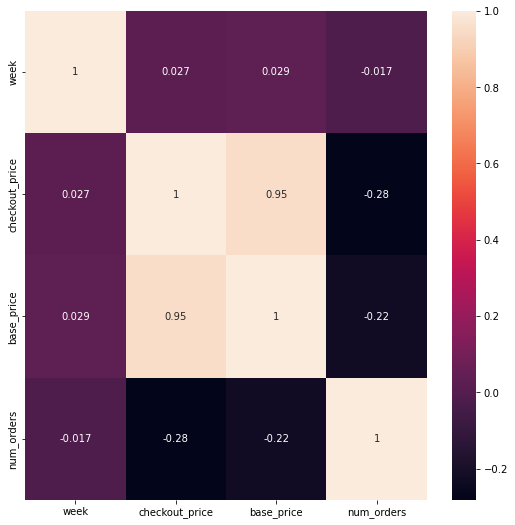

In [24]:
plt.figure(figsize = (9,9))
sns.heatmap(num_df.corr(), annot=True)
plt.show()

In [25]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [26]:
std_scaler = StandardScaler()
min_mx_scale =  MinMaxScaler()

### Scaling and encoding done on both test and train together. because, it can affect calculation.

In [27]:
df_total[['checkout_price','base_price']]= std_scaler.fit_transform(df_total[['checkout_price','base_price']])
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [28]:
df_total[['week']]=min_mx_scale.fit_transform(df_total[['week']])

In [29]:
df_total.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,0.0,55,1885,-1.281184,-1.259867,0,0,177.0
1,1466964,0.0,55,1993,-1.281184,-1.362517,0,0,270.0
2,1346989,0.0,55,2539,-1.294058,-1.362329,0,0,189.0
3,1338232,0.0,55,2139,0.043267,0.518969,0,0,54.0
4,1448490,0.0,55,2631,-0.584095,-0.697293,0,0,40.0


In [30]:
enc_cols = ['center_id', 'meal_id']
df_enc = df_total[enc_cols]

# df_total.drop(columns=enc_cols, axis=1)
df_total = df_total.drop(df_enc, axis=1)
df_total.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,0.0,-1.281184,-1.259867,0,0,177.0
1,1466964,0.0,-1.281184,-1.362517,0,0,270.0
2,1346989,0.0,-1.294058,-1.362329,0,0,189.0
3,1338232,0.0,0.043267,0.518969,0,0,54.0
4,1448490,0.0,-0.584095,-0.697293,0,0,40.0


In [31]:
df_enc.head()

,center_id,meal_id
0,55,1885
1,55,1993
2,55,2539
3,55,2139
4,55,2631


In [32]:
OHE = OneHotEncoder(sparse=False)
columns = df_enc.columns.tolist()
df_total_OHE = OHE.fit_transform(df_enc[columns])
encoded_columns = OHE.get_feature_names_out(columns) 
df_OHE = pd.DataFrame(df_total_OHE, columns=encoded_columns, index=df_enc.index)
df_OHE.head()


,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,...,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_total_scaled_encoded = pd.concat([df_total, df_OHE],axis= 1)
df_total_scaled_encoded = df_total_scaled_encoded.drop(['id'], axis =1)

In [34]:
df_total_scaled_encoded.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_id_10,center_id_11,center_id_13,center_id_14,...,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956
0,0.0,-1.281184,-1.259867,0,0,177.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1.281184,-1.362517,0,0,270.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.294058,-1.362329,0,0,189.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.043267,0.518969,0,0,54.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.584095,-0.697293,0,0,40.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_total_scaled_encoded.shape

(489121, 134)

In [36]:
df_train_final = df_total_scaled_encoded[df_total_scaled_encoded['num_orders'].notnull()]
df_test_final = df_total_scaled_encoded[df_total_scaled_encoded['num_orders'].isnull()]

df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Columns: 134 entries, week to meal_id_2956
dtypes: float64(132), int64(2)
memory usage: 470.2 MB


In [37]:
df_test_final['num_orders'].isna().sum()
df_test_final= df_test_final.drop(['num_orders'], axis =1)

## Test - train split

In [38]:
y_train = df_train_final['num_orders']

df_train_final= df_train_final.drop(['num_orders'], axis =1)

X_train = df_train_final

X_test = df_test_final
# y_test

## Regression models

In [ ]:
# Linear Regression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

pred_LR = model_LR.predict(X_test)
print("completed")

In [ ]:
# SVR
model_SVR1 = SVR(kernel='rbf') # linear,poly
model_SVR1.fit(X_train, y_train)

pred_SVR1 = model_SVR1.predict(X_test)
print("completed")

In [ ]:
#Random Forest regressot
model_RF = RandomForestRegressor(random_state=42)
model_RF.fit(X_train, y_train)

pred_RF = model_RF.predict(X_test)
print("completed")

In [ ]:
#Decision tree regression
model_DT = DecisionTreeRegressor(random_state=42) 
model_DT.fit(X_train, y_train)

pred_DT = model_DT.predict(X_test)
print("completed")

In [ ]:
# SVR
model_SVR2 = SVR(kernel='linear') 
model_SVR2.fit(X_train, y_train)

pred_SVR2 = model_SVR2.predict(X_test)
print("completed")

In [ ]:
# SVR
model_SVR3 = SVR(kernel='poly')
model_SVR3.fit(X_train, y_train)

pred_SVR3 = model_SVR3.predict(X_test)
print("completed")

## Hyperparameter tuning

In [ ]:

param_grid_dt = {'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}


param_dist_rf = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}


dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)

# DT_regressior : grid search
grid_search_dt = GridSearchCV(estimator=dt_regressor, param_grid=param_grid_dt,cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# RF_regressior : random search
random_search_rf = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist_rf,
                                      n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_rf.fit(X_train, y_train)
print("Best hyperparameters for Random Forest:", random_search_rf.best_params_)

## Output file creation

In [ ]:
def prep_output (X_test_ID, y_pred, algo_type ):
  df_pred = pd.DataFrame(y_pred, columns = ['num_orders'])

  df_op= pd.concat([X_test_ID, y_pred], axis = 1, ignore_index=True)
  file_path = algo_type + '_output.csv'
  df_op.to_csv(file_path, index=False)
  return df_op

#df_test_ID

In [ ]:
df_op_LR = prep_output(df_test_ID, pred_LR, 'Linear_Regression')
df_op_SVR1 = prep_output(df_test_ID, pred_SVR3, 'SVR_rbf')
df_op_SVR2 = prep_output(df_test_ID, pred_SVR3, 'SVR_linear')
df_op_SVR3 = prep_output(df_test_ID, pred_SVR3, 'SVR_Poly')
df_op_DT = prep_output(df_test_ID, pred_DT, 'Decision_Tree')
df_op_RF = prep_output(df_test_ID, pred_RF, 'Random_Forest')